In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
X=6 * np.random.rand(100,1) - 3
#this can be anything here we have taken from [-3 to 3)
y = 0.5 * X**2 +1.5*X + 2 + np.random.randn(100,1)
#here we have added some random noise and and the noise values is normally distrubuted ie either it increases by some values or decreases by some values
#99.7% of the values will be in the range of -3 to 3



<Axes: >

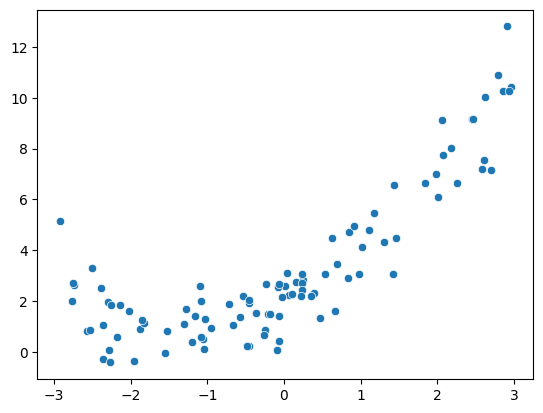

In [86]:
sns.scatterplot(x=X.ravel(),y=y.ravel())

Clearly the data is not linear

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [88]:
X_train.shape

(80, 1)

In [89]:
y_train.shape

(80, 1)

Lets implement a simple linear Regression

In [90]:
from sklearn.linear_model import LinearRegression
lrreg=LinearRegression()
lrreg.fit(X_train,y_train)

LinearRegression()

In [91]:
from sklearn.metrics import r2_score
score=r2_score(y_test,lrreg.predict(X_test))
score

0.7545854918840813

Obiously the r_score is low 
Now lets visualize the model

<Axes: >

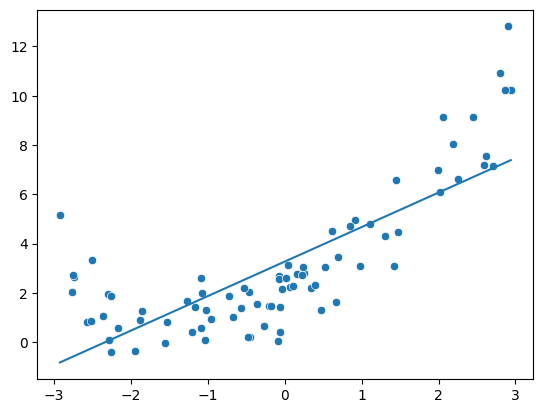

In [92]:
sns.scatterplot(x=X_train.ravel(),y=y_train.ravel())
sns.lineplot(x=X_train.ravel(),y=lrreg.predict(X_train).ravel())

Obiously since the data is not linear any line couldnt fit it

So, lets solve it using polynomial regression

In [93]:
from sklearn.preprocessing import PolynomialFeatures

In [113]:
poly=PolynomialFeatures(degree=3,include_bias=True)
#include bias means it will also consider degress  less than 2
X_train_poly=poly.fit_transform(X_train)
#fit_transform ensures that calculated parameters also add new columns
X_test_poly=poly.transform(X_test)
#only transform because we dont want to calculate parameter based on test data but rather we already trained on the basis of train data and we just want to use it here


In [114]:
X_train_poly

array([[ 1.00000000e+00, -2.06202493e-01,  4.25194683e-02,
        -8.76762037e-03],
       [ 1.00000000e+00,  1.98912156e+00,  3.95660456e+00,
         7.87016743e+00],
       [ 1.00000000e+00, -2.28447958e+00,  5.21884694e+00,
        -1.19223492e+01],
       [ 1.00000000e+00, -4.56428855e-01,  2.08327300e-01,
        -9.50865909e-02],
       [ 1.00000000e+00, -1.02656556e+00,  1.05383685e+00,
        -1.08183262e+00],
       [ 1.00000000e+00,  2.50380127e-01,  6.26902080e-02,
         1.56963822e-02],
       [ 1.00000000e+00, -1.88404724e+00,  3.54963401e+00,
        -6.68767817e+00],
       [ 1.00000000e+00, -4.59566472e-01,  2.11201342e-01,
        -9.70610555e-02],
       [ 1.00000000e+00,  5.29151197e-01,  2.80000990e-01,
         1.48162859e-01],
       [ 1.00000000e+00, -2.66873332e-01,  7.12213751e-02,
        -1.90070856e-02],
       [ 1.00000000e+00, -2.29313532e+00,  5.25846958e+00,
        -1.20583823e+01],
       [ 1.00000000e+00, -5.31743744e-01,  2.82751409e-01,
      

As clearly seen it adds new features as x^2

Now lets train the model

In [115]:
from sklearn.linear_model import LinearRegression
pol_reg=LinearRegression()
pol_reg.fit(X_train_poly,y_train)

LinearRegression()

In [116]:
from sklearn.metrics import r2_score
score=r2_score(y_test,pol_reg.predict(X_test_poly))
score

0.9508583768333846

Obiously the model is better now

In [117]:
pol_reg.coef_

array([[ 0.        ,  1.61742372,  0.52800471, -0.04031084]])

Lets plot this

<Axes: >

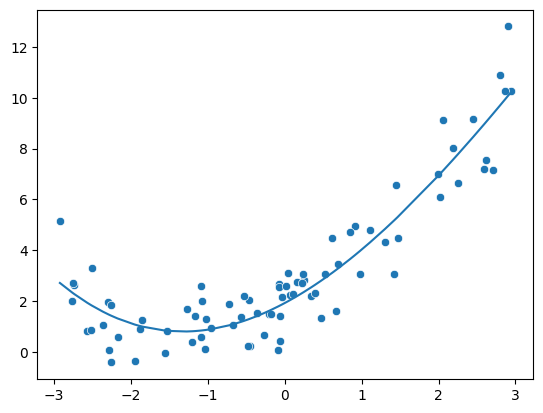

In [118]:
sns.scatterplot(x=X_train.ravel(),y=y_train.ravel())
sns.lineplot(x=X_train.ravel(),y=pol_reg.predict(X_train_poly).ravel())

Now play with the degree of polynomial
As we do so on increasing degree we realize for x_train the curve fits best for more points however the r2 score for test decrese so choose degree wisely

In this case i can find that r2 score is more for degree=3 but as we run the code from beginning random data would be different so r2 score might change 

Prediction of new data set

<Axes: >

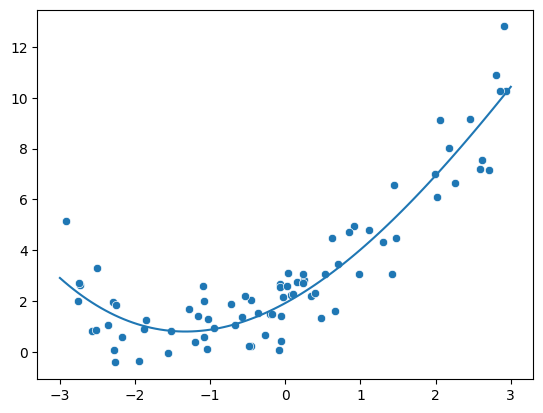

In [122]:
X_new=np.linspace(-3,3,100).reshape(100,1)
X_new_poly=poly.transform(X_new)

sns.scatterplot(x=X_train.ravel(),y=y_train.ravel())
sns.lineplot(x=X_new.ravel(),y=pol_reg.predict(X_new_poly).ravel())

Now lets build a generic funtion that takes degree as parameter

Also we'll use Pipeline library so that we can explore it

In [127]:
from sklearn.pipeline import Pipeline

In [128]:
X_new

array([[-3.        ],
       [-2.93939394],
       [-2.87878788],
       [-2.81818182],
       [-2.75757576],
       [-2.6969697 ],
       [-2.63636364],
       [-2.57575758],
       [-2.51515152],
       [-2.45454545],
       [-2.39393939],
       [-2.33333333],
       [-2.27272727],
       [-2.21212121],
       [-2.15151515],
       [-2.09090909],
       [-2.03030303],
       [-1.96969697],
       [-1.90909091],
       [-1.84848485],
       [-1.78787879],
       [-1.72727273],
       [-1.66666667],
       [-1.60606061],
       [-1.54545455],
       [-1.48484848],
       [-1.42424242],
       [-1.36363636],
       [-1.3030303 ],
       [-1.24242424],
       [-1.18181818],
       [-1.12121212],
       [-1.06060606],
       [-1.        ],
       [-0.93939394],
       [-0.87878788],
       [-0.81818182],
       [-0.75757576],
       [-0.6969697 ],
       [-0.63636364],
       [-0.57575758],
       [-0.51515152],
       [-0.45454545],
       [-0.39393939],
       [-0.33333333],
       [-0

In [133]:
def polynomial_reg(degree):
    poly=PolynomialFeatures(degree=degree,include_bias=True)
    lr=LinearRegression()
    poly_reg=Pipeline([
        ("polynomial_features",poly),
        ("linear_regression",lr)
    ])

    poly_reg.fit(X_train,y_train)
    # first it transforms the data and then fits the model
    y_pred=poly_reg.predict(X_new)

    #plotting prediction line

    sns.scatterplot(x=X_train.ravel(),y=y_train.ravel())
    sns.lineplot(x=X_new.ravel(),y=y_pred.ravel())

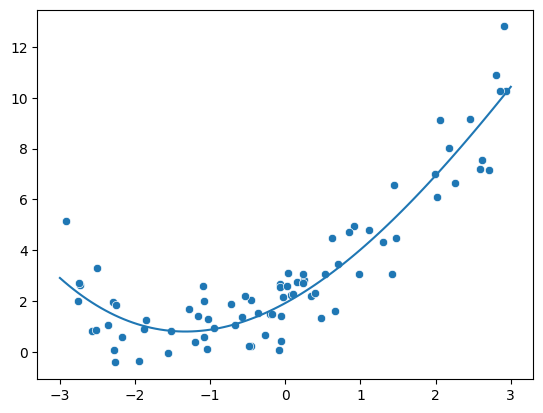

In [137]:
polynomial_reg(3)